In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [48]:
sixty = pd.read_csv('../data/combined_cleaned.csv',dtype={'WINTERPEAKDEMAND': np.float64, 'SUMMERPEAKDEMAND': np.float64},index_col='Unnamed: 0')
df = sixty[sixty['DATAYEAR'] < 2018].copy()
df['REV_PER_MWH_SOLD'] = df['TOTALREVENUE']/df['TOTALSALES']
ab = np.abs(df['REV_PER_MWH_SOLD'].min())
df['LOG_REV_PER_MWH_SOLD'] = np.log(df['REV_PER_MWH_SOLD']+ab+.000000001)

In [30]:
print(df.head())

   UTILITYCODE                   UTILITYNAME  WINTERPEAKDEMAND  \
0         34.0             Abbeville City of            9798.0   
1         84.0           A & N Electric Coop           24338.0   
2        150.0  Adrian Public Utilities Comm            2736.0   
3        155.0                 Agralite Coop           18405.0   
4        174.0  Aitkin Public Utilities Comm            5079.0   

   SUMMERPEAKDEMAND  TOTALREVENUE  TOTALSALES  DATAYEAR  INSERVICEYEAR  \
0           12177.0        3597.0     54037.0      1990           1946   
1           31865.0        9941.0    143500.0      1990           1961   
2            2311.0         662.0     11587.0      1990           1941   
3           27201.0        5782.0     92809.0      1990           1951   
4            5049.0        1499.0     25800.0      1990           1930   

   NAMEPLATECAPACITY  MW_COAL  ...  PCT_NUCLEAR   PCT_OIL  PCT_OTHER  \
0              3.700      0.0  ...          0.0  0.099099        0.0   
1             

In [31]:
print(df.shape)

(22236, 32)


In [32]:
print(df.columns)

Index(['UTILITYCODE', 'UTILITYNAME', 'WINTERPEAKDEMAND', 'SUMMERPEAKDEMAND',
       'TOTALREVENUE', 'TOTALSALES', 'DATAYEAR', 'INSERVICEYEAR',
       'NAMEPLATECAPACITY', 'MW_COAL', 'MW_GEOTHERMAL', 'MW_HYDROELECTRIC',
       'MW_NATURAL_GAS', 'MW_NUCLEAR', 'MW_OIL', 'MW_OTHER', 'MW_SOLAR',
       'MW_WIND', 'PCT_COAL', 'PCT_GEOTHERMAL', 'PCT_HYDROELECTRIC',
       'PCT_NATURAL_GAS', 'PCT_NUCLEAR', 'PCT_OIL', 'PCT_OTHER', 'PCT_SOLAR',
       'PCT_WIND', 'is_0', 'is_1', 'is_2', 'is_3', 'REV_PER_MWH_SOLD'],
      dtype='object')


In [33]:
COAL = []
NATURALGAS = []
OIL = []
HYDRO = []
GEOTHERMAL = []
WIND = []
SOLAR = []
NUCLEAR = []
OTHER = []
YEAR = []



for i in range(1990,2018):
    df1 = sixty[sixty['DATAYEAR'] == i]
    COAL.append(df1.MW_COAL.sum())
    NATURALGAS.append(df1.MW_NATURAL_GAS.sum())
    OIL.append(df1.MW_OIL.sum())
    HYDRO.append(df1.MW_HYDROELECTRIC.sum())
    GEOTHERMAL.append(df.MW_GEOTHERMAL.sum())
    WIND.append(df1.MW_WIND.sum())
    SOLAR.append(df1.MW_SOLAR.sum())
    NUCLEAR.append(df1.MW_NUCLEAR.sum())
    OTHER.append(df1.MW_OTHER.sum())
    YEAR.append(i)

dct_MW = {'COAL':COAL,'NATURALGAS':NATURALGAS,'OIL':OIL,'HYDRO':HYDRO,'WIND':WIND,'SOLAR':SOLAR,'NUCLEAR':NUCLEAR}

dct_gen_plot = {}
for item in dct_MW.items():
    dct_gen_plot[item[0]] = list([item[1][0],item[1][16],item[1][27]])
years = list([YEAR[0],YEAR[16],YEAR[27]])

In [18]:
print(YEAR)

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


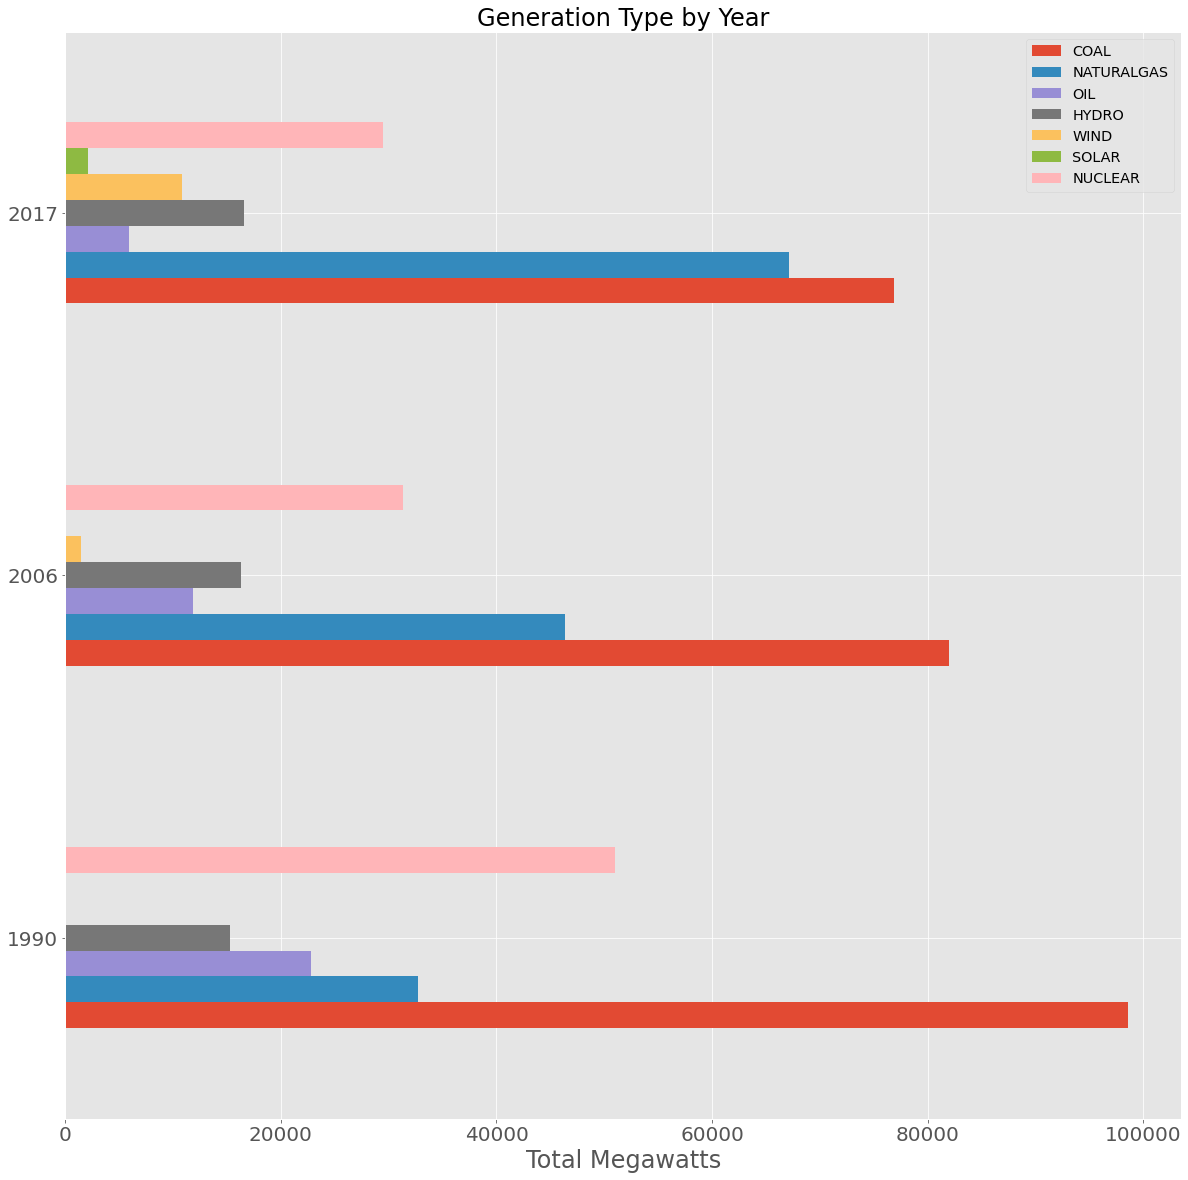

In [34]:
df_mw = pd.DataFrame(dct_gen_plot,columns=list(dct_gen_plot.keys()), index = years)

fig, ax = plt.subplots(figsize=(20,20))
df_mw.plot.barh(ax=ax)

# plt.figure(figsize=(20,20))
# plt.title('Store Inventory')
# plt.ylabel('Product')
# plt.xlabel('Quantity')
# plt.bar_label(dct_gen_plot.keys(),padding=3)
legend = plt.legend(fontsize='x-large')
plt.setp(legend.get_texts(), color='black')
ax.set_title('Generation Type by Year',color='black',fontsize=24)
plt.xticks(fontsize=20)
plt.xlabel('Total Megawatts',fontsize=24)
plt.yticks(fontsize=20)
plt.show()
# plt.savefig()

In [35]:
df.head()

,UTILITYCODE,UTILITYNAME,WINTERPEAKDEMAND,SUMMERPEAKDEMAND,TOTALREVENUE,TOTALSALES,DATAYEAR,INSERVICEYEAR,NAMEPLATECAPACITY,MW_COAL,...,PCT_NUCLEAR,PCT_OIL,PCT_OTHER,PCT_SOLAR,PCT_WIND,is_0,is_1,is_2,is_3,REV_PER_MWH_SOLD
0,34.0,Abbeville City of,9798.0,12177.0,3597.0,54037.0,1990,1946,3.700,0.0,...,0.0,0.099099,0.0,0.0,0.0,0,1,0,0,0.066566
1,84.0,A & N Electric Coop,24338.0,31865.0,9941.0,143500.0,1990,1961,0.225,0.0,...,0.0,1.000000,0.0,0.0,0.0,0,0,1,0,0.069275
2,150.0,Adrian Public Utilities Comm,2736.0,2311.0,662.0,11587.0,1990,1941,2.000,0.0,...,0.0,0.500000,0.0,0.0,0.0,0,1,0,0,0.057133
3,155.0,Agralite Coop,18405.0,27201.0,5782.0,92809.0,1990,1951,5.000,0.0,...,0.0,0.200000,0.0,0.0,0.0,0,0,1,0,0.062300
4,174.0,Aitkin Public Utilities Comm,5079.0,5049.0,1499.0,25800.0,1990,1930,0.500,0.0,...,0.0,0.500000,0.0,0.0,0.0,0,1,0,0,0.058101


In [36]:
COAL = []
NATURALGAS = []
OIL = []
HYDRO = []
GEOTHERMAL = []
WIND = []
SOLAR = []
NUCLEAR = []
OTHER = []
YEAR = []



for i in range(1990,2018):
    df1 = sixty[sixty['DATAYEAR'] == i]
    COAL.append(df1.PCT_COAL.mean())
    NATURALGAS.append(df1.PCT_NATURAL_GAS.mean())
    OIL.append(df1.PCT_OIL.mean())
    HYDRO.append(df1.PCT_HYDROELECTRIC.mean())
    GEOTHERMAL.append(df1.PCT_GEOTHERMAL.mean())
    WIND.append(df1.PCT_WIND.mean())
    SOLAR.append(df1.PCT_SOLAR.mean())
    NUCLEAR.append(df1.PCT_NUCLEAR.mean())
    OTHER.append(df1.PCT_OTHER.mean())
    YEAR.append(i)

dct_MW = {'COAL':COAL,'NATURALGAS':NATURALGAS,'OIL':OIL,'HYDRO':HYDRO,'GEOTHERMAL':GEOTHERMAL,'WIND':WIND,'SOLAR':SOLAR,'NUCLEAR':NUCLEAR,'OTHER':OTHER}

dct_gen_plot = {}
for item in dct_MW.items():
    dct_gen_plot[item[0]] = list([item[1][0],item[1][16],item[1][27]])
years = list([YEAR[0],YEAR[16],YEAR[27]])


In [21]:
print(years)

[1990, 2006, 2017]


In [22]:
print(df.shape)

(22236, 31)


In [37]:
y_train = pd.read_csv('../data/y_train.csv',index_col='Unnamed: 0')
y_train = y_train['0']
y_train_unlog = pd.Series(df['TOTALREVENUE']/df['TOTALSALES'])

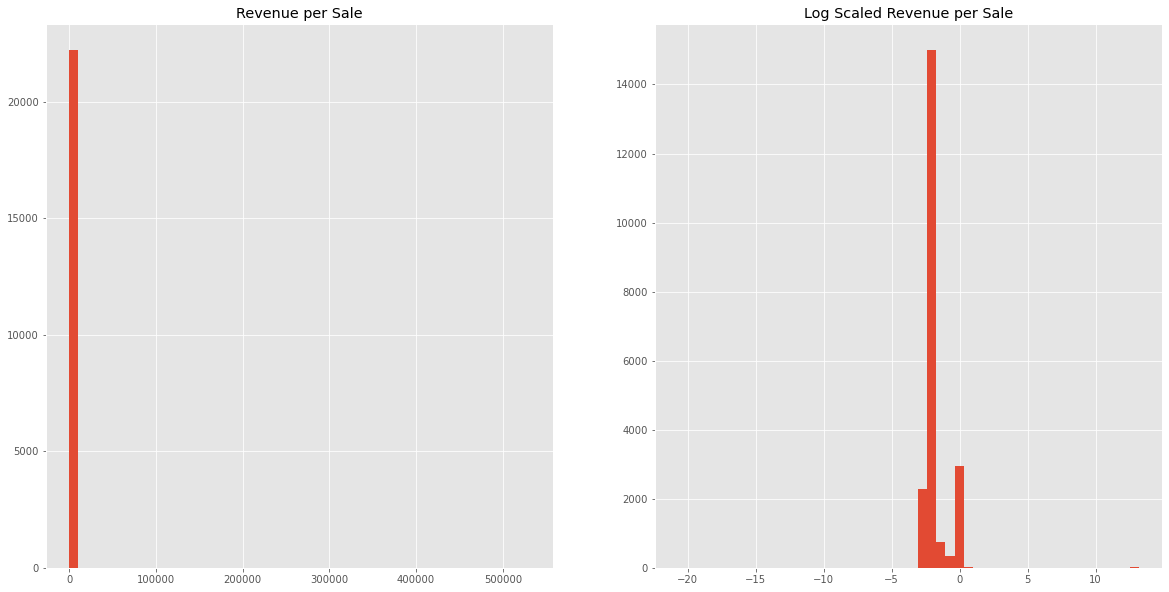

In [38]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[1].hist(x=y_train,bins=50)
ax[1].set_title('Log Scaled Revenue per Sale',color='black')
ax[0].hist(x=y_train_unlog,bins=50)
ax[0].set_title('Revenue per Sale',color='black');

In [39]:
# df_scatter = df.drop(columns=['UTILITYCODE','UTILITYNAME','DATAYEAR']).copy()
# for col in df_scatter.columns:
#     if col.startswith('PCT_') or col.startswith('is_'):
#         df_scatter = df_scatter.drop(columns=col)
# fig,ax = plt.subplots(figsize=(24,24))
# pd.plotting.scatter_matrix(df_scatter,ax=ax)
# plt.show()

In [59]:
REV_PER_SALE = []
YEAR = []



for i in range(1990,2018):
    df1 = df[df['DATAYEAR'] == i]
    REV_PER_SALE.append(df1.LOG_REV_PER_MWH_SOLD.mean())
    YEAR.append(i)

dct_MW = {"Revenue per Sale":REV_PER_SALE,"Year":YEAR}

dct_gen_plot = {}
for item in dct_MW.items():
    dct_gen_plot[item[0]] = list([item[1][0],item[1][16],item[1][27]])
years = list([YEAR[0],YEAR[16],YEAR[27]])


<BarContainer object of 28 artists>

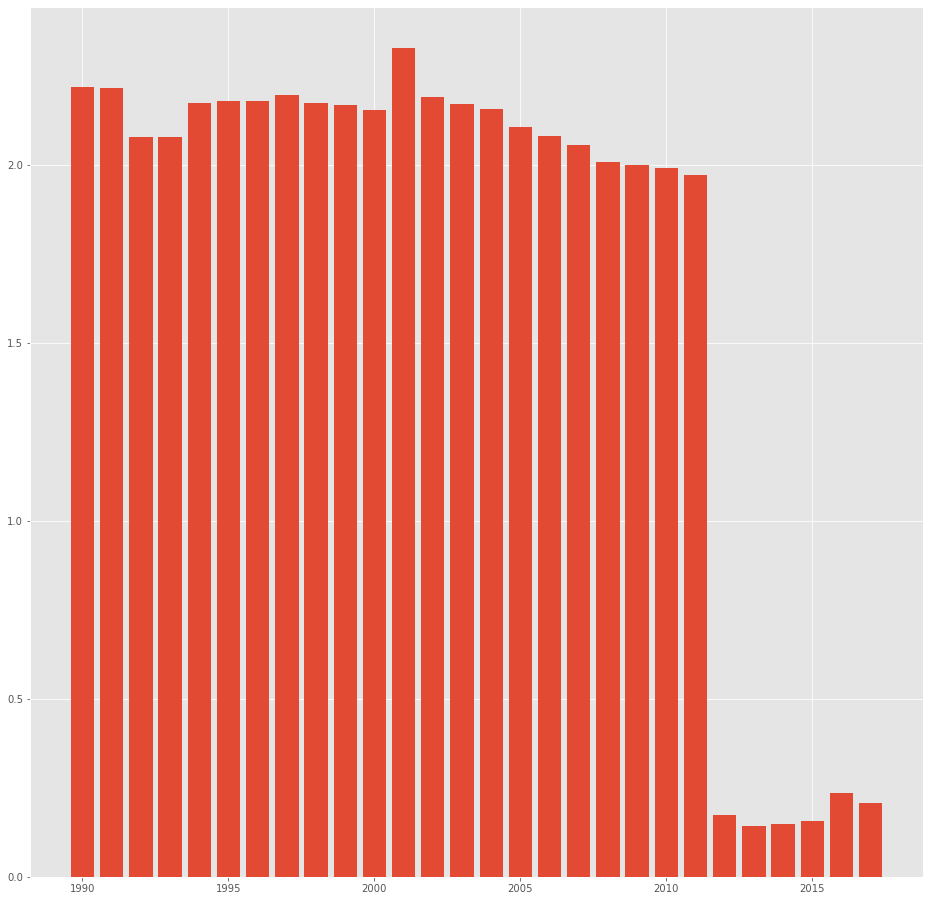

In [60]:
fig, ax = plt.subplots(figsize=(16,16))
ax.bar(x=np.abs(dct_MW['Year']),height=np.abs(dct_MW['Revenue per Sale']))
ax.

note: in 2012 sales reporting switched to include B2B sales, drastically increasing # of sales, reducing revenue per sale

In [68]:
type_agg = df.groupby(['DATAYEAR']).agg({'is_0':'sum','is_1':'sum','is_2':'sum','is_3':'sum'})

type_agg = type_agg.reset_index()

type_agg['TOTAL'] = type_agg['is_0'] + type_agg['is_1'] + type_agg['is_2'] + type_agg['is_3']

type_agg = type_agg.rename(columns={'is_0':'Other','is_1':'Municipal','is_2':'Cooperative','is_3':'Retail Power Marketer'})

print(type_agg.shape)
type_agg.head()

(28, 6)


,DATAYEAR,Other,Municipal,Cooperative,Retail Power Marketer,TOTAL
0,1990,40,519,85,201,845
1,1991,41,520,85,199,845
2,1992,68,573,87,202,930
3,1993,67,573,87,205,932
4,1994,48,565,86,186,885


In [103]:
pct_muni = []
pct_coop = []
pct_rpm = []
pct_other = []


for i in range(1990,2018):
    df1 = type_agg[type_agg['DATAYEAR'] == i]
    pct_muni.append(df1.Municipal.mean()/df1.TOTAL.mean())
    pct_coop.append(df1.Cooperative.mean()/df1.TOTAL.mean())
    pct_rpm.append(df1['Retail Power Marketer'].mean()/df1.TOTAL.mean())
    pct_other.append(df1.Other.mean()/df1.TOTAL.mean())
    YEAR.append(i)

pct_muni

dct_MW = {}
    
dct_gen_plot = {'Other':pct_other,'Municipal':pct_muni,'Cooperative':pct_coop,'RPM':pct_rpm}
for item in dct_gen_plot.items():
    dct_gen_plot[item[0]] = list([item[1][0],item[1][16],item[1][27]])
years = list([YEAR[0],YEAR[16],YEAR[27]])


In [80]:
dct_gen_plot

{'Other': [0.047337278106508875, 0.23205128205128206, 0.3219047619047619],
 'Municipal': [0.6142011834319526, 0.6820512820512821, 0.5428571428571428],
 'Cooperative': [0.10059171597633136,
  0.08461538461538462,
  0.13142857142857142],
 'Retail Power Marketer': [0.2378698224852071,
  0.001282051282051282,
  0.0038095238095238095]}

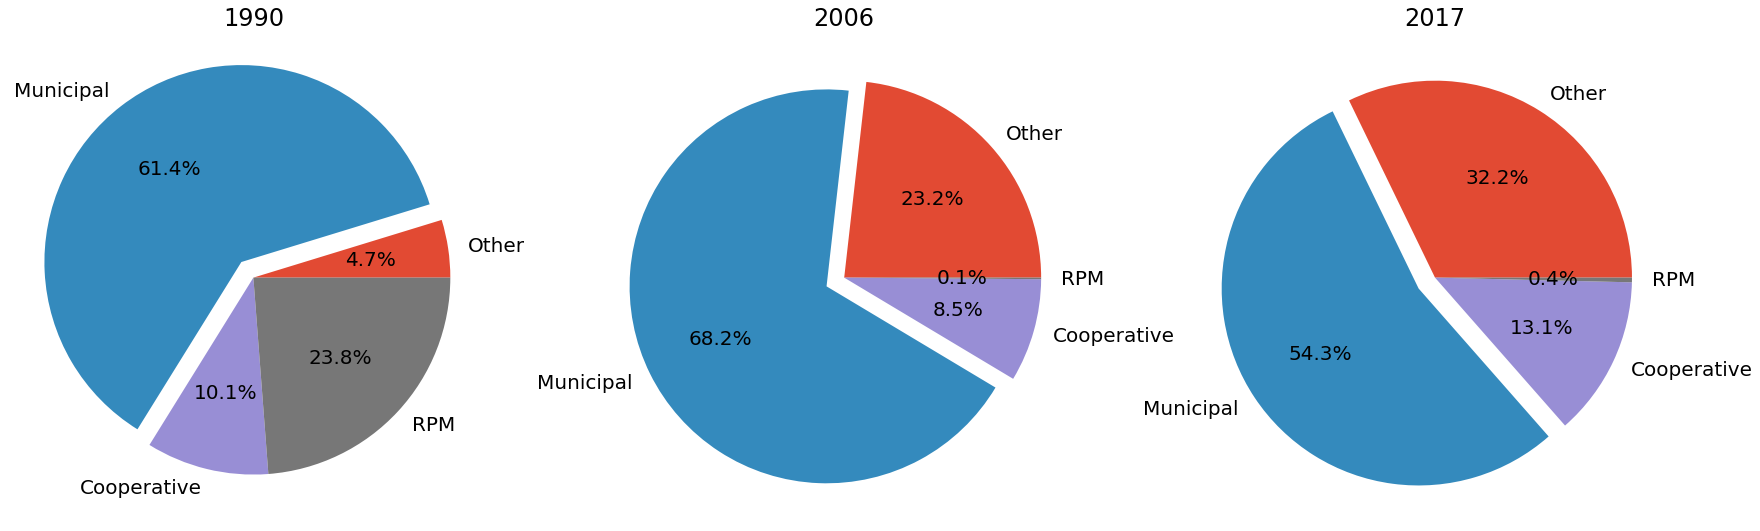

In [106]:
labels = list(dct_gen_plot.keys())
sizes_1 = list([dct_gen_plot['Other'][0],dct_gen_plot['Municipal'][0],dct_gen_plot['Cooperative'][0],dct_gen_plot['RPM'][0]])
sizes_2 = list([dct_gen_plot['Other'][1],dct_gen_plot['Municipal'][1],dct_gen_plot['Cooperative'][1],dct_gen_plot['RPM'][1]])
sizes_3 = list([dct_gen_plot['Other'][2],dct_gen_plot['Municipal'][2],dct_gen_plot['Cooperative'][2],dct_gen_plot['RPM'][2]])
explode = (0,.1,0,0)

fig, ax = plt.subplots(1,3,figsize=(30,30))
ax.flatten()[0].pie(sizes_1, labels=labels,explode=explode,autopct='%1.1f%%',textprops={'fontsize': 20})
ax.flatten()[1].pie(sizes_2, labels=labels,explode=explode,autopct='%1.1f%%',textprops={'fontsize': 20})
ax.flatten()[2].pie(sizes_3, labels=labels,explode=explode,autopct='%1.1f%%',textprops={'fontsize': 20})
ax.flatten()[0].set_title(years[0],fontsize=24)
ax.flatten()[1].set_title(years[1],fontsize=24)
ax.flatten()[2].set_title(years[2],fontsize=24)
# ax.flatten()[0].labels(years[0])
# ax.flatten()[1].set_title(years[1])
# ax.flatten()[2].set_title(years[2])
plt.show();
# plt.savefig('../images/ownershiptypes.png',dpi=60)